<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>
<p>(This project study about covid, which is one of the most infectious virus in history)</p>


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Phần I, II, câu 2 phần III|100%
|Nguyễn Huy Hoàn|20127166|Phần I, II , câu 1 phần III|100%
|Bùi Thanh Lâm|20127402|Phần I, II, câu 2 phần III|100%
|Đào Ngọc Hoa|20127500|Phần I, II , câu 1 phần III|100%
|Võ Thanh Lâm|20127546|Phần I, II, câu 2 phần III|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [2]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-25.csv',
 'Date2023-03-06.csv',
 'Date2023-02-24.csv',
 'Date2023-03-05.csv',
 'Date2023-02-28.csv',
 'Date2023-03-04.csv',
 'Date2023-02-27.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-02-26.csv',
 'Date2023-03-02.csv',
 'Date2023-03-01.csv',
 'Date2023-03-03.csv']

In [3]:
df_list = (pd.read_csv(file) for file in csv_files)

In [4]:
big_df = pd.concat(df_list, ignore_index=True)

In [5]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,"214,218,172","+40,328","1,536,158",163.0,"198,825,034","+48,813","13,856,980","15,525",...,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
1,NaN,\nNorth America\n,"124,457,883","+3,224","1,609,932",22.0,"119,727,312","+39,206","3,120,639","7,752",...,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
2,NaN,\nEurope\n,"246,142,903","+26,187","2,016,380",59.0,"241,738,153","+30,708","2,388,370","6,468",...,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
3,NaN,\nSouth America\n,"67,971,613","+5,524","1,350,389",28.0,"66,209,167","+4,552","412,057","10,188",...,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279
4,NaN,\nOceania\n,"13,987,204",+13,"26,076",NaN,"13,826,303",+19,"134,825",64,...,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN,2023-02-25 22:51:32.725279


**The number of rows and columns**

In [6]:
rows, cols = big_df.shape
rows, cols

(3211, 23)

**This bar club have 5314 different products, with their infomation as follow:**

|Atrribute|Meanings
| :------ | ---
|Vendor_code|The time that a student fill the form
|Name|The gender of a student
|Retail_price|The age of a student
|Base_unit|The course that a student is participating
|Country_of_Origin|The current year of a student
|Size|The current GPA of a student
|ABV|Whether a student married or not

In [7]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    3003 non-null   float64
 1   Country,Other        3211 non-null   object 
 2   TotalCases           3211 non-null   object 
 3   NewCases             803 non-null    object 
 4   TotalDeaths          3211 non-null   object 
 5   NewDeaths            457 non-null    float64
 6   TotalRecovered       2938 non-null   object 
 7   NewRecovered         786 non-null    object 
 8   ActiveCases          2964 non-null   object 
 9   Serious,Critical     1843 non-null   object 
 10  Tot Cases/1M pop     3003 non-null   object 
 11  Deaths/1M pop        2925 non-null   object 
 12  TotalTests           2769 non-null   object 
 13  Tests/
1M pop
       2769 non-null   object 
 14  Population           3003 non-null   object 
 15  Continent            3159 non-null   o

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [8]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [9]:
big_df[columns] = big_df[columns].apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [10]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,3003.000000,3.211000e+03,803.000000,3.133000e+03,457.000000,2.938000e+03,786.000000,2.964000e+03,1843.000000,3003.000000,2925.000000,2.769000e+03,2.769000e+03,2.977000e+03,2977.000000,2899.000000,2769.000000,262.000000,313.000000,2866.000000
mean,116.000000,1.377065e+07,6738.929016,1.411299e+05,58.654267,1.436521e+07,9510.099237,4.397000e+05,1254.789474,198155.613720,1312.340855,3.260036e+07,2.125327e+06,3.469404e+07,404.204568,14465.090031,10.726616,97.328244,0.771278,28607.331821
std,66.694437,6.842685e+07,18060.345175,6.828149e+05,117.219162,6.856999e+07,25032.593303,2.421254e+06,5322.129311,200840.425404,1450.963540,1.179606e+08,3.619159e+06,1.383577e+08,4138.752524,57102.427908,26.698515,276.970625,1.824461,91614.651439
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02,1.000000,153.000000,0.000000,1.000000,0.010000,1.000000
25%,58.000000,2.537500e+04,24.000000,2.270000e+02,3.000000,2.327600e+04,30.250000,5.700000e+01,4.000000,17228.000000,175.000000,3.478150e+05,1.899430e+05,4.454310e+05,3.000000,499.500000,0.000000,4.000000,0.100000,55.250000
50%,116.000000,2.510710e+05,177.000000,2.804000e+03,10.000000,3.079295e+05,255.500000,1.327000e+03,17.000000,124778.000000,818.000000,2.226216e+06,8.851190e+05,5.797805e+06,8.000000,1255.000000,1.000000,13.000000,0.300000,539.500000
75%,174.000000,2.037773e+06,3224.000000,1.987800e+04,62.000000,2.439497e+06,3651.750000,1.404100e+04,74.000000,328416.000000,2063.000000,1.303338e+07,2.439107e+06,2.210284e+07,58.000000,6120.000000,5.000000,86.250000,0.700000,3308.000000
max,231.000000,6.809447e+08,134557.000000,6.807084e+06,705.000000,6.539172e+08,177825.000000,2.044346e+07,40670.000000,873589.000000,8733.000000,1.167936e+09,2.330212e+07,1.448471e+09,62616.000000,626161.000000,196.000000,3083.000000,20.000000,611101.000000


**Convert `Date` to datatime type**

In [11]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

# Countries

In [12]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,...,110461.0,1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-25
9,2.0,USA,105172692,2747.0,1144461.0,20.0,102605010.0,37149.0,1423221.0,2588.0,...,3476874.0,3.348053e+08,North America,3.0,293.0,0.0,NaN,0.06,4251.0,2023-02-25
10,3.0,India,44686017,218.0,530769.0,5.0,44153099.0,154.0,2149.0,NaN,...,652854.0,1.406632e+09,Asia,31.0,2650.0,2.0,NaN,NaN,2.0,2023-02-25
11,4.0,France,39612797,3843.0,164877.0,NaN,39377523.0,2603.0,70397.0,869.0,...,4139547.0,6.558452e+07,Europe,2.0,398.0,0.0,NaN,NaN,1073.0,2023-02-25
12,5.0,Germany,38111063,NaN,167812.0,NaN,37658600.0,3800.0,284651.0,NaN,...,1458359.0,8.388360e+07,Europe,2.0,500.0,1.0,NaN,NaN,3393.0,2023-02-25


**Values distribution of Numeric columns**

In [13]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,3003.0,1.160000e+02,6.669444e+01,1.00,58.00,116.0,174.00,2.310000e+02,6.5
TotalCases,3003.0,2.944892e+06,9.545877e+06,5.00,23948.00,206673.0,1304100.00,1.054419e+08,6.5
NewCases,649.0,1.667599e+03,3.867416e+03,1.00,17.00,105.0,623.00,3.297000e+04,79.8
TotalDeaths,2925.0,3.023317e+04,1.059289e+05,1.00,225.00,2179.0,14452.00,1.147217e+06,8.9
NewDeaths,319.0,1.680564e+01,2.658817e+01,1.00,2.00,5.0,16.00,1.580000e+02,90.1
TotalRecovered,2730.0,3.019675e+06,9.601888e+06,2.00,21596.00,235145.5,1473262.00,1.029747e+08,15.0
NewRecovered,636.0,2.355788e+03,6.789348e+03,1.00,17.00,140.0,1293.75,7.630900e+04,80.2
ActiveCases,2756.0,8.861151e+04,7.958627e+05,0.00,53.00,1053.0,10110.00,1.151930e+07,14.2
"Serious,Critical",1635.0,1.246073e+02,6.393730e+02,1.00,4.00,13.0,52.00,7.557000e+03,49.1
Tot Cases/1M pop,2977.0,1.956941e+05,1.965751e+05,16.00,17214.00,124778.0,314800.00,7.039590e+05,7.3


**Values distribution of Catergorial columns**

In [14]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Continent,Date
missing_percentage,0.0,0.9,0.0
num_values,231,6,13
value_percentages,"{'Channel Islands': 0.4, 'Chile': 0.4, 'Malawi': 0.4, 'Senegal': 0.4, 'San Marino': 0.4, 'Czechi...","{'Africa': 25.3, 'Asia': 21.8, 'Europe': 21.0, 'North America': 17.0, 'Australia/Oceania': 8.7, ...","{2023-02-26: 7.7, 2023-03-07: 7.7, 2023-03-08: 7.7, 2023-02-25: 7.7, 2023-03-05: 7.7, 2023-03-03..."


<a class="anchor" id="3.1"></a>
# Question 1: <center>Which countries have had high newcases recently? Why?</center> 
**Introduction:**
The background (academics environment and current situation) can influence either positively or negatively a person’s mental well-being. These factors can be current year of study, marial status, age, ...  In this project, we would like to study the relationship between students' background and their mental health issues. Finding this connection would help schools give useful advices for students as well as prepare mental health support for students.

**Step summary:**
1. [Total cases analysis](#3.1.1)
2. [Vaccines analysis](#3.1.2)
3. [...](#3.1.3)
4. [...](#3.1.4)
5. [...](#3.1.5)
6. [...](#3.1.6)
7. [...](#3.1.7)

### **Total case Analysis** :The number of infected cases in each territory 

# Continents

In [15]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')]
continents_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\nAsia\n,214218172,40328.0,1536158.0,163.0,198825034.0,48813.0,13856980.0,15525.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25
1,NaN,\nNorth America\n,124457883,3224.0,1609932.0,22.0,119727312.0,39206.0,3120639.0,7752.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25
2,NaN,\nEurope\n,246142903,26187.0,2016380.0,59.0,241738153.0,30708.0,2388370.0,6468.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25
3,NaN,\nSouth America\n,67971613,5524.0,1350389.0,28.0,66209167.0,4552.0,412057.0,10188.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25
4,NaN,\nOceania\n,13987204,13.0,26076.0,NaN,13826303.0,19.0,134825.0,64.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25


**Values distribution of Numeric columns**

In [16]:
df = continents_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,78.0,1.133782e+08,9.194855e+07,12791178.0,14001210.00,96254003.0,2.143723e+08,246678291.0,97.6
NewCases,64.0,1.691050e+04,1.703981e+04,1.0,1413.50,13160.0,2.956675e+04,58588.0,98.0
TotalDeaths,78.0,1.133741e+06,7.365280e+05,26076.0,258590.00,1443488.0,1.611890e+06,2020080.0,97.6
NewDeaths,56.0,9.573214e+01,7.939212e+01,1.0,18.25,84.5,1.537500e+02,297.0,98.3
TotalRecovered,78.0,1.088501e+08,8.829857e+07,12074525.0,13839013.00,92998569.5,1.990123e+08,242290544.0,97.6
NewRecovered,68.0,2.201981e+04,2.212665e+04,1.0,791.25,19284.5,3.880250e+04,86938.0,97.9
ActiveCases,78.0,3.394415e+06,4.831384e+06,134825.0,396513.00,1415221.0,3.116286e+06,13865628.0,97.6
"Serious,Critical",78.0,6.759115e+03,5.402230e+03,55.0,548.00,7085.5,1.018750e+04,15549.0,97.6
Tot Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Values distribution of Catergorial columns**

In [17]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Continent,Date
missing_percentage,0.0,0.9,0.0
num_values,231,6,13
value_percentages,"{'Channel Islands': 0.4, 'Chile': 0.4, 'Malawi': 0.4, 'Senegal': 0.4, 'San Marino': 0.4, 'Czechi...","{'Africa': 25.3, 'Asia': 21.8, 'Europe': 21.0, 'North America': 17.0, 'Australia/Oceania': 8.7, ...","{2023-02-26: 7.7, 2023-03-07: 7.7, 2023-03-08: 7.7, 2023-02-25: 7.7, 2023-03-05: 7.7, 2023-03-03..."


<a class="anchor" id="3.2"></a>
# Question 2. <center>What are the current trends of covid pandemic among continents?</center> 

**Introduction**
As we think, a student would find the support from specialists when they have any symtoms of `anxiety`,`depression`,`panic attack`. However, this fact raise the question that whether they would have as we think in the real world? Therefore, we would find the answer for this question and from this, we can give useful advices for students to care more about their mental health.

**Step summary:**
1. **Mental health issues analysis**
2. **Preprocessing**
3. **Visualization**
4. **Modeling**

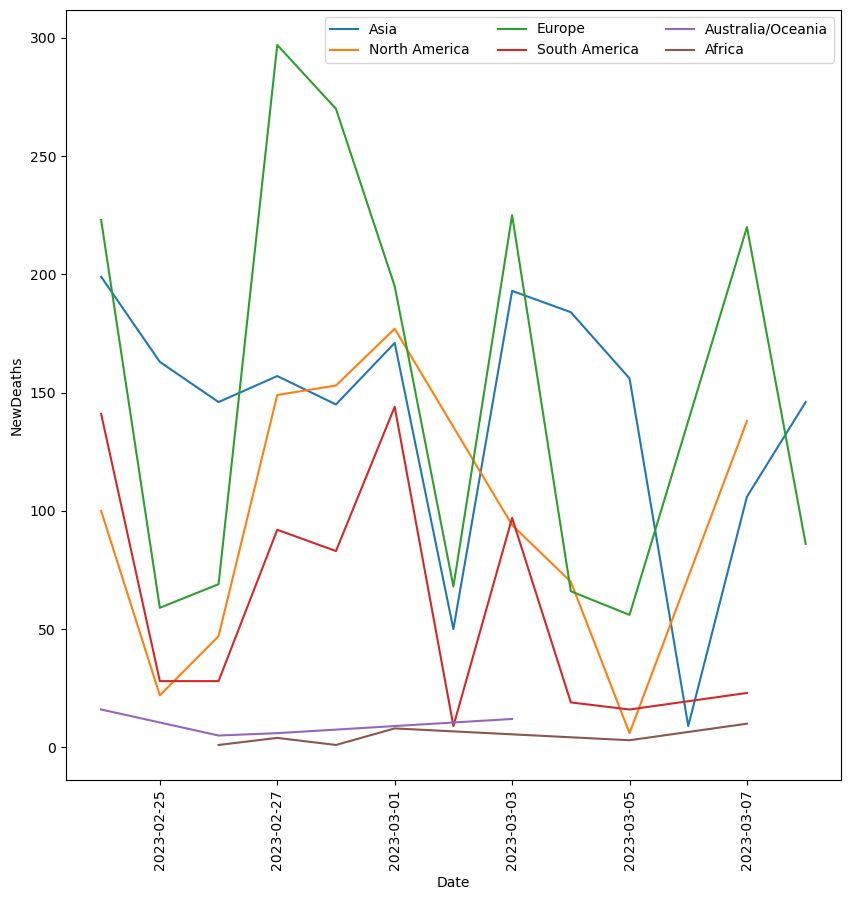

In [18]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="NewDeaths",
             hue="Continent", data=continents_df)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

(array([19413., 19415., 19417., 19419., 19421., 19423.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

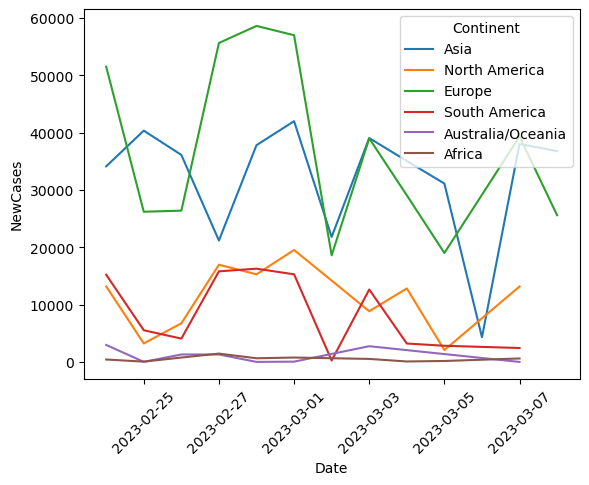

In [19]:
sns.lineplot(x="Date", y="NewCases",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

(array([19413., 19415., 19417., 19419., 19421., 19423.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

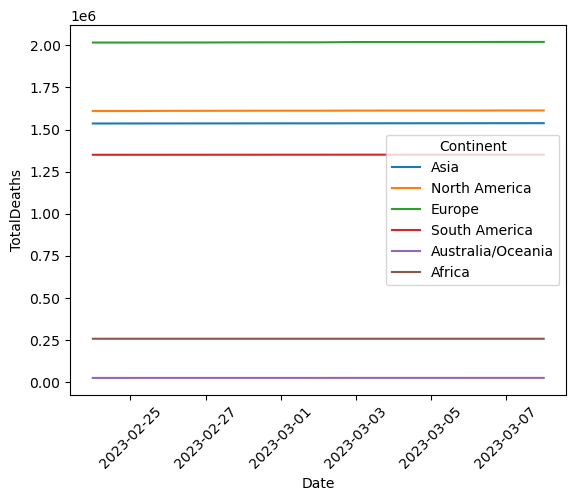

In [20]:
sns.lineplot(x="Date", y="TotalDeaths",
             hue="Continent", data=continents_df)
plt.xticks(rotation=45)

In [22]:
tmp_df =countries_df.groupby(['Date','Continent']).Population.sum().reset_index()
tmp_df

,Date,Continent,Population
0,2023-02-24,Africa,1.406729e+09
1,2023-02-24,Asia,4.711357e+09
2,2023-02-24,Australia/Oceania,4.347041e+07
3,2023-02-24,Europe,7.475438e+08
4,2023-02-24,North America,5.981409e+08
...,...,...,...
73,2023-03-08,Asia,4.711357e+09
74,2023-03-08,Australia/Oceania,4.347041e+07
75,2023-03-08,Europe,7.475438e+08
76,2023-03-08,North America,5.981409e+08


<AxesSubplot:xlabel='Continent', ylabel='Population'>

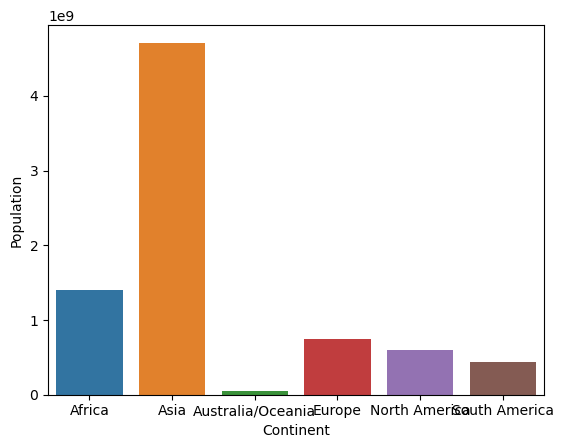

In [23]:
sns.barplot(data=tmp_df, x="Continent", y="Population")

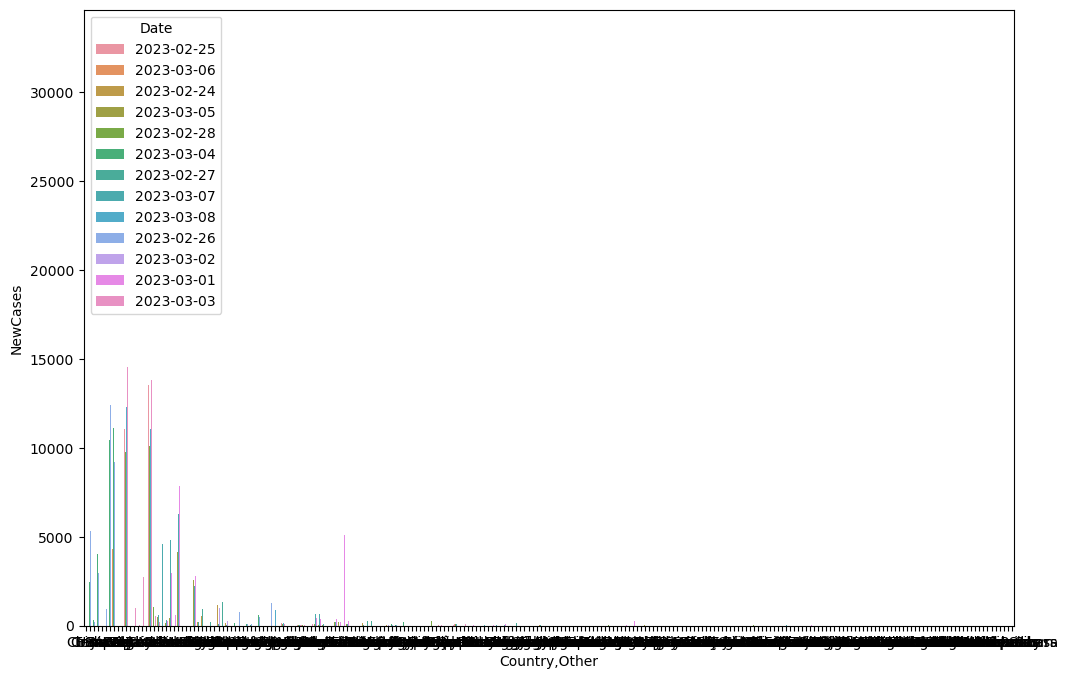

In [24]:
f = plt.figure(figsize=(12, 8))
fig = sns.barplot(data=countries_df, x = 'Country,Other', y = 'NewCases',hue='Date')

In [25]:
countries_df[countries_df['NewCases'] > 582]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
9,2.0,USA,105172692,2747.0,1144461.0,20.0,102605010.0,37149.0,1423221.0,2588.0,314131.0,3418.0,1.164076e+09,3476874.0,334805269.0,North America,3.0,293.0,0.0,NaN,0.06,4251.0,2023-02-25
11,4.0,France,39612797,3843.0,164877.0,NaN,39377523.0,2603.0,70397.0,869.0,603996.0,2514.0,2.714902e+08,4139547.0,65584518.0,Europe,2.0,398.0,0.0,NaN,NaN,1073.0,2023-02-25
13,6.0,Brazil,37023465,2934.0,698933.0,5.0,36185975.0,NaN,138557.0,NaN,171919.0,3246.0,6.377617e+07,296146.0,215353593.0,South America,6.0,308.0,3.0,NaN,0.02,643.0,2023-02-25
14,7.0,Japan,33172567,14846.0,72206.0,72.0,21680804.0,5174.0,11419557.0,173.0,264145.0,575.0,9.494266e+07,756004.0,125584838.0,Asia,4.0,1739.0,1.0,NaN,0.60,90931.0,2023-02-25
15,8.0,S. Korea,30489666,9913.0,33940.0,11.0,30245452.0,16100.0,210274.0,181.0,593994.0,661.0,1.580406e+07,307892.0,51329899.0,Asia,2.0,1512.0,3.0,NaN,0.20,4097.0,2023-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24.0,Austria,5931599,5275.0,21919.0,3.0,5850048.0,3692.0,59632.0,81.0,654217.0,2418.0,2.112735e+08,23302116.0,9066710.0,Europe,2.0,414.0,0.0,582.0,0.30,6577.0,2023-03-03
2999,28.0,Chile,5174951,2861.0,64210.0,13.0,5101501.0,NaN,9240.0,87.0,268826.0,3336.0,4.848656e+07,2518757.0,19250195.0,South America,4.0,300.0,0.0,149.0,0.70,480.0,2023-03-03
3005,34.0,Czechia,4612902,906.0,42460.0,7.0,4560259.0,1804.0,10183.0,47.0,429635.0,3955.0,5.701332e+07,5310093.0,10736784.0,Europe,2.0,253.0,0.0,84.0,0.70,948.0,2023-03-03
3015,44.0,Serbia,2495185,804.0,17844.0,5.0,2462649.0,812.0,14692.0,10.0,288360.0,2062.0,1.242273e+07,1435653.0,8653016.0,Europe,3.0,485.0,1.0,93.0,0.60,1698.0,2023-03-03


In [27]:
df = countries_df[countries_df['Date']==datetime.date.today()]

In [ ]:
countries_df[countries_df['Serious,Critical'] > 3000]